## Practice Real Estate - Price Predictor

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv("Boston.csv")

In [4]:
housing.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
housing.drop('Unnamed: 0',axis='columns', inplace=True)

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [13]:
housing['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [14]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Plotting Histograms

In [15]:
import matplotlib.pyplot as plt

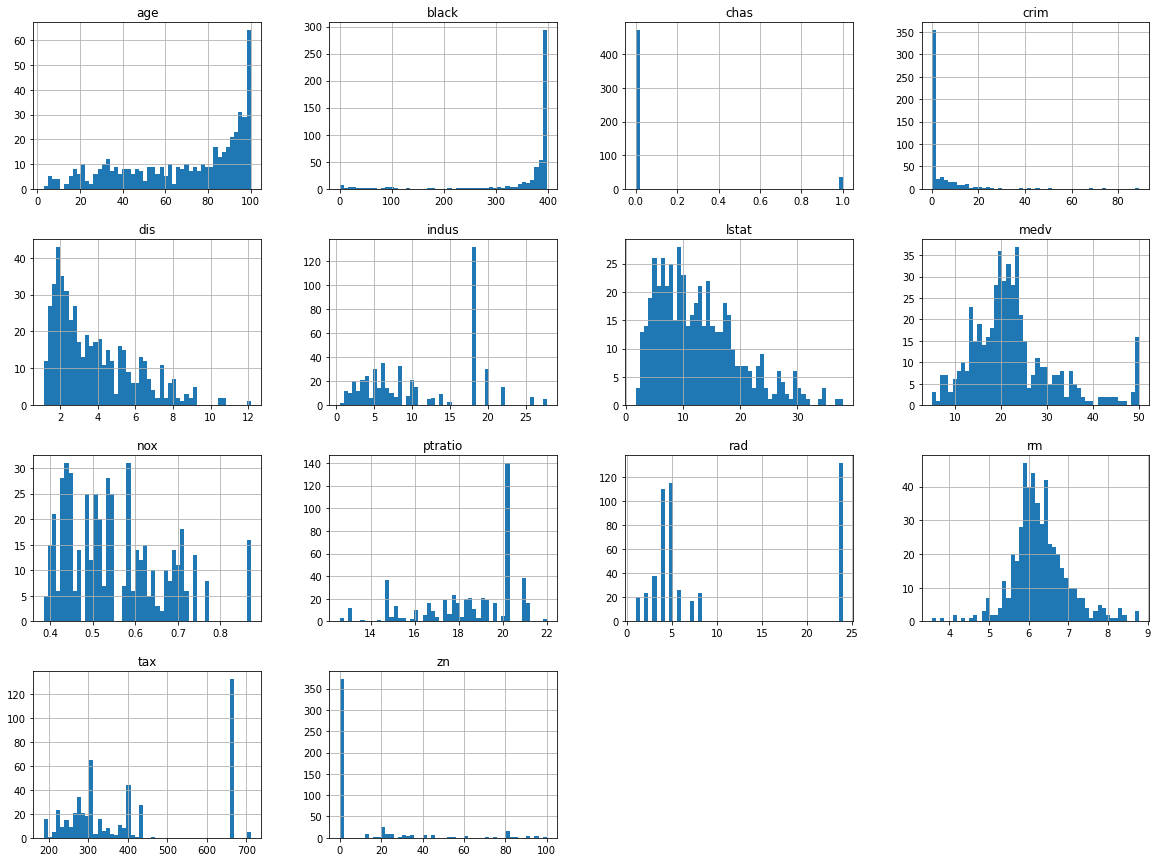

In [16]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

## Training and Test Data Splitting

In [17]:
import numpy as np

In [10]:
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
# #     print(shuffled)
#     test_set_size = int(len(data)*test_ratio)
    
#     train_indices = shuffled[ :test_set_size]
#     test_indices = shuffled[test_set_size: ]
    
#     return data.iloc[test_indices], data.iloc[train_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)

# print(f"Rows in Training Set:{len(train_set)}\nRows in Testing Set:{len(test_set)}")

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)

In [20]:
print(f"Rows in Training Set:{len(train_set)}\nRows in Testing Set:{len(test_set)}")

Rows in Training Set:404
Rows in Testing Set:102


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [24]:
for train_index, test_index in split.split(housing, housing['chas']):
    strate_train_set = housing.loc[train_index]
    strate_test_set = housing.loc[test_index]

In [26]:
strate_test_set['chas'].value_counts()

0    95
1     7
Name: chas, dtype: int64

In [27]:
95/7

13.571428571428571

In [29]:
strate_train_set['chas'].value_counts()

0    376
1     28
Name: chas, dtype: int64

In [30]:
376/28

13.428571428571429

In [31]:
housing = strate_train_set.copy()

## Looking for Correlations

In [32]:
corr_matrix = housing.corr()

In [34]:
corr_matrix['medv'].sort_values(ascending = False)

medv       1.000000
rm         0.679894
black      0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
lstat     -0.740494
Name: medv, dtype: float64

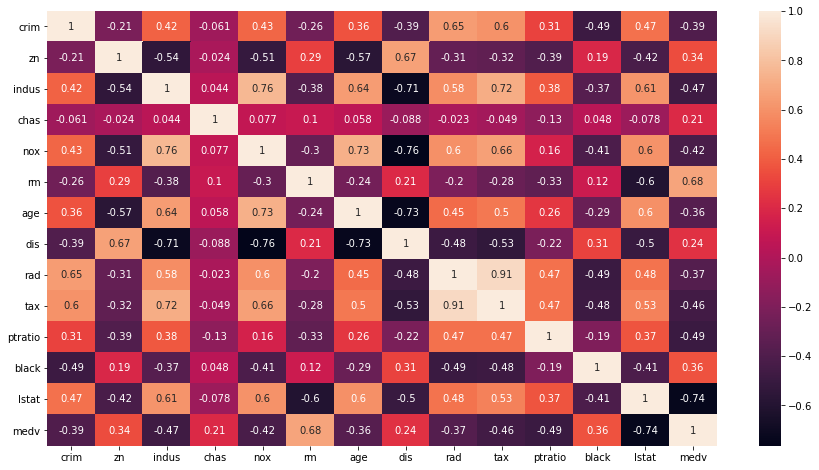

In [42]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Plotting Matrix Graphs

In [43]:
from pandas.plotting import scatter_matrix

In [47]:
attrib = ['medv', 'rm', 'zn', 'lstat']

c:\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
T

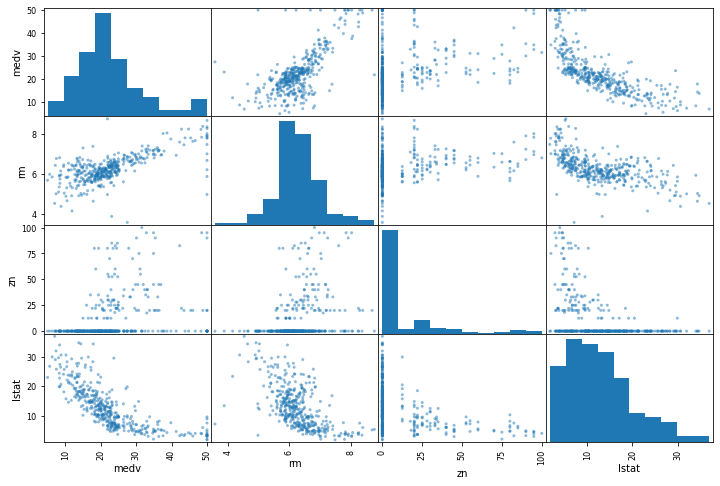

In [48]:
scatter_matrix(housing[attrib], figsize = (12, 8))
plt.show()

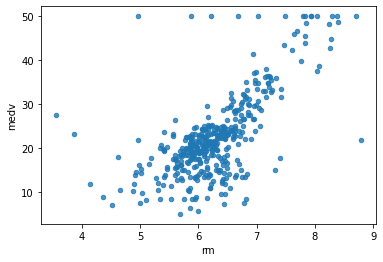

In [49]:
housing.plot(kind='scatter', x='rm', y='medv', alpha=0.8)

## Trying out Attribute Combinations

In [50]:
housing['taxrm'] = housing['tax']/housing['rm']

In [51]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,taxrm
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [52]:
corr_matrix = housing.corr()

In [53]:
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.679894
black      0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
taxrm     -0.525160
lstat     -0.740494
Name: medv, dtype: float64

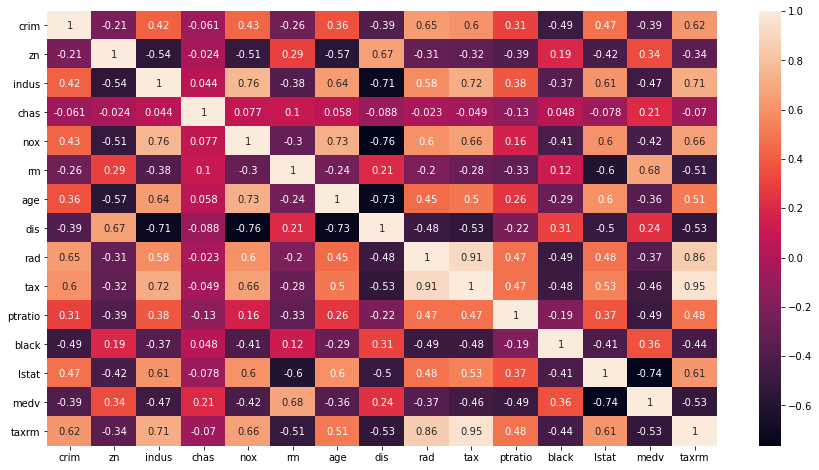

In [54]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

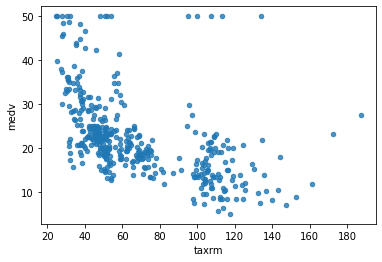

In [55]:
housing.plot(kind='scatter', x='taxrm', y='medv',alpha=0.8)
plt.show()

## Separate Labels

In [56]:
housing = strate_train_set.drop('medv', axis=1)
housing_labels = strate_train_set['medv'].copy()

## handle with Missing Attributes

In [57]:
# to take care of missing attributes, we have three options:
# 1. get rid of missing data points
# 2. get rid of the whole attributes
# 3. set the values to some value(like 0, mean or medium)

In [58]:
# option-1
a = housing.dropna(subset=['rm'])
a.shape

(404, 13)

In [59]:
# option-2
housing.drop('rm', axis=1).shape

(404, 12)

In [60]:
median = housing['rm'].median()

In [61]:
housing['rm'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [62]:
housing.shape

(404, 13)

In [63]:
housing.describe() #before we started missing filling attributes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Put the value (Median) on the place of missing/blank places

In [64]:
from sklearn.impute import SimpleImputer

In [65]:
imputer = SimpleImputer(strategy='median')

In [66]:
imputer.fit(housing)

SimpleImputer(strategy='median')

In [67]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [68]:
x = imputer.transform(housing)

In [69]:
housing_tr = pd.DataFrame(x, columns=housing.columns)

In [70]:
housing_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

In [71]:
# Primarily, three types of objects
# 1. Estimator -
# 2. Transformers
# 3. Predictors

## Feature Scaling

In [72]:
# Primarily, Two types of scaling methods:

# 1. Min-Max Scalling (Normalization)- 
#    (value-min)/(max-min) 
#    sklearn provide 'MinMaxScaler' class 

# 2. Standardization
#    (value-mean)/std
#     sklearn provide 'StandardScaler' class

## Creating a Pipelines

In [73]:
from sklearn.pipeline import Pipeline

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
my_pipelines = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
    ])

In [76]:
housing_num_tr = my_pipelines.fit_transform(housing)

In [77]:
housing_num_tr.shape

(404, 13)

## Selecting a desired Model

In [79]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [80]:
some_data = housing.iloc[:5]

In [81]:
some_labels = housing_labels.iloc[:5]

In [82]:
prepared_data = my_pipelines.transform(some_data)

In [83]:
model.predict(prepared_data)

array([22.448, 25.643, 16.389, 23.271, 23.533])

In [84]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evoluting the Model

In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
housing_prediction = model.predict(housing_num_tr)

In [87]:
mse = mean_squared_error(housing_labels, housing_prediction)

In [88]:
rmse = np.sqrt(mse)

In [89]:
print(f"The Value of RMSE is : {rmse}")

The Value of RMSE is : 1.1850124231708734


## Using better Evolution Model - Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [92]:
rmse_scores = np.sqrt(-scores)

In [93]:
rmse_scores

array([2.83011464, 2.79606436, 4.49827115, 2.55228496, 3.44955877,
       2.59448703, 5.02518879, 3.40162619, 2.90767407, 3.22616226])

In [94]:
def print_scores(scores):
    print(f"Scores is:{scores}\nMean is:{scores.mean()}\nStandard Deviation is:{scores.std()}")

In [95]:
print_scores(rmse_scores)

Scores is:[2.83011464 2.79606436 4.49827115 2.55228496 3.44955877 2.59448703
 5.02518879 3.40162619 2.90767407 3.22616226]
Mean is:3.3281432216937086
Standard Deviation is:0.7828056443778565


## Saving the project

In [96]:
from joblib import dump, load

In [97]:
dump(model,'Practice.joblib')

['Practice.joblib']

## Testing the model on Test_dataset

In [99]:
x_test = strate_test_set.drop('medv', axis=1)

In [100]:
y_test = strate_test_set['medv'].copy()

In [101]:
x_test_prepared = my_pipelines.transform(x_test)

In [102]:
final_prediction = model.predict(x_test_prepared)

In [103]:
final_mse = mean_squared_error(y_test, final_prediction)

In [104]:
final_rmse = np.sqrt(final_mse)

In [105]:
print(final_prediction, list(y_test))

[25.028 11.395 25.937 22.258 19.204 15.017 20.153 14.806 32.327 40.471
 19.422 11.611 23.267 29.252 19.495 11.281 31.804 14.359 23.663 18.38
 20.14  18.047 16.934 22.073 18.046 31.999 15.839 33.293  9.057 33.554
 23.939 21.207 22.886 10.661 20.84  11.4   42.36  24.257 23.023 42.279
 23.843 29.807 20.352 21.106 19.438 32.759 44.662 19.959 20.017 22.494
 21.002 15.058 21.285 15.212 25.414 32.871 42.033 29.297 19.537 20.739
 46.877  9.941 18.904 25.607 15.216 32.836 20.189 18.089 19.169 34.401
 25.886 22.687 21.307 22.362 34.961 12.726 15.945 20.104 20.535 21.298
 22.322 21.213 14.129 23.112 21.037 21.364 14.216 21.272 22.087 23.047
 18.684 26.801  7.136 26.249 18.431 30.002 19.753 31.547 14.155 26.906
 21.549 20.483] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [106]:
final_rmse

2.943735961625073

In [107]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [108]:
from joblib import dump, load

In [109]:
import numpy as np

In [110]:
model =load('Practice.joblib')

In [111]:
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])

In [113]:
model.predict(features)

array([26.09])

# using pickle

In [114]:
import pickle

In [115]:
#Saving the model
pickle.dump(model, open('model.pkl','wb'))

In [116]:
#Load the model
model = pickle.load(open('model.pkl','rb'))

In [117]:
print(model.predict([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]]))

[26.09]
